# Lattice Dynamics and Density Functional Perturbation Theory - Quasi-Harmonic Level

The script 'thermodyanmics.py' is a comprehensive module for lattice dynamics based on harmonic and quasi-harmonic level of theory. For simplicity, this tutorial is focused only on quasi-harmonic fittings of phonons and thermodynamics of that level. For harmonic part, please refer to 'thermodynamics-QHA'.

**Classes used in this tutorial are defined in 'crystal_functions.thermodynamics'. Documentations and source codes are attached at the bottom of this page.**

## Tests
2 tests are performed based on the same method.

1. 0 pressure equilibrium volumes of Form I paracetamol, ranging from 0K to 330K. Compared with experimental measurements ([C. C. Wilson, Z. Kristallogr. Cryst. Mater., 2000, 215, 693–701](https://www.degruyter.com/document/doi/10.1524/zkri.2000.215.11.693/html)).  
2. 0~1GPa thermodynamic properties of Form I paracetamol, ranging from 0K to 330K. As an illustration of the complete output file. 

Method explanation:

* Analytical expression of electron total energy is fitted to the third-order Birch-Murnaghan equation of states.  
* Analytical expression of phonon frequencies is fitted to the second- and third-order polynomials. The third -order polynomial is used for thermodynamics.  
* Gibbs free energy G(T, p) is minimized with BFGS algorithm without boundary conditions. 

**N.B.** This module is still under development. Planned update: Gruneisen model and anisotropic thermal expansion.

### 0\~330K, 0 pressure thermodyanmics
This part is used for comparison with experimental measurements, in order to illustrate effectiveness of QHA method implemented here. 4 $\Gamma$-point phonon calculations of Form I paracetamol with various volumes are used ('QHA' folder in 'data/').

In [2]:
import numpy as np
from crystal_functions.thermodynamics import Quasi_harmonic

file_list = ['data/QHA/f1-m4freq.out', 'data/QHA/f1-p4freq.out',
             'data/QHA/f1-p8freq.out', 'data/QHA/f1-r0freq.out']
tempt = np.array([20, 50, 80, 150, 200, 250, 330], dtype=float)
press = np.linspace(0, 1, 10)

qha = Quasi_harmonic().from_HA_files(file_list, write_out=True, filename='data/f1-thermo-QHA.dat')
qha.thermodynamics(temperature=tempt, pressure=press, 
                   eos_method='birch_murnaghan', freq_method='polynomial',
                   poly_order=[2, 3], min_method='BFGS', write_out=True, filename='data/f1-thermo-QHA.dat')

         Volume:  724.6544801689456   Temperature:  20.0   Pressure:  0.5555555555555556
         Volume:  714.3109546967437   Temperature:  20.0   Pressure:  0.6666666666666666
         Volume:  709.4722395817672   Temperature:  20.0   Pressure:  0.7777777777777777
         Volume:  698.3276409132774   Temperature:  20.0   Pressure:  0.8888888888888888


/home/huanyu/Software/anaconda3/envs/crystal_py3.8/lib/python3.8/site-packages/crystal_functions/thermodynamics.py:177: RuntimeWarning: overflow encountered in square
  temperature * expon / (expon - 1)**2 * 1000


         Volume:  692.016074681912   Temperature:  20.0   Pressure:  1.0
         Volume:  736.5906675225253   Temperature:  50.0   Pressure:  0.4444444444444444
         Volume:  728.7279307334819   Temperature:  50.0   Pressure:  0.5555555555555556
         Volume:  707.3540530339408   Temperature:  50.0   Pressure:  0.6666666666666666
         Volume:  703.4231867415023   Temperature:  50.0   Pressure:  0.7777777777777777
         Volume:  692.5316504672961   Temperature:  50.0   Pressure:  0.8888888888888888
         Volume:  699.6454289345511   Temperature:  50.0   Pressure:  1.0
         Volume:  735.1838148581135   Temperature:  80.0   Pressure:  0.4444444444444444
         Volume:  729.3661067073817   Temperature:  80.0   Pressure:  0.5555555555555556
         Volume:  706.9847532034673   Temperature:  80.0   Pressure:  0.6666666666666666
         Volume:  692.9376030779514   Temperature:  80.0   Pressure:  0.7777777777777777
         Volume:  692.6195243907358   Temperature:  

Warning messages are printed out since the fitted volume data exceeds the sampled volume data, which might cause inaccuracies due to the extrapolated volume & phonon frequencies. According to warning messages, smaller volumes should be sampled when generating the phonon frequency data. 

No warning message is printed out for 0 pressure thermodynamics. Fitted data and expermiental data are plotted for comparison in the following code block. The difference is within 5 cm^3/mol, which is a good agreement with experimental measurements. The increased thermal expansion around 50\~150K is reproduced.

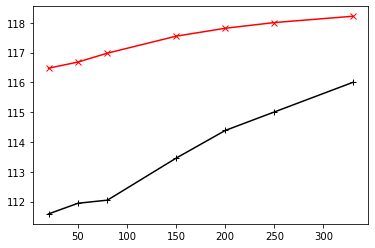

In [4]:
import matplotlib.pyplot as plt

exp = np.array([111.5836, 111.9421, 112.0463, 113.4580, 114.3871, 
                115.0082, 116.0031])
qha_zerop = qha.equilibrium_volume[:, 0]
# Angstrom^3 to cm^3/mol
qha_zerop = qha_zerop * 0.602214 / 4

plt.plot(tempt, exp, '+-k')
plt.plot(tempt,qha_zerop, 'x-r')

### 0\~330K, 0\~1GPa thermodyanmics
The format of the output file obtained from the previous calculation (f1-thermo-QHA.dat) is briefly explained in this section. Generally speaking, titles of each section are printed in upper case, with '\#' at the beginning of the line. Brief explanations, if necessary, are given in the following lines in the lower case. 

Following information is reported in sequence:

#### Combined HA phonon data

1. Volumes of sampled HA phonons  
2. DFT total energies of sampled HA phonons  
3. Mode frequencies as functions of volumes

```
# COMBINED QHA DATA
## SAMPLED VOLUMES(ANGSTROM^3) =
## DFT TOTAL ENERGIES(KJ/MOL CELL) =
## DFT TOTAL ENERGIES(KJ/MOL CELL) =

## COMBINED MODES

### FREQUENCIES AT QPOINT #

  Mode #    Volume(Angstrom^3)        Frequency(THz)
```

#### Equation of states fitted for DFT total energy
To get the analytical expression of internal energy as the function of volume, U(V), excluding the zero point energy, the DFT total energy is fitted to equation of states (EoS) specified. The [pymatgen.analysis.eos module](https://pymatgen.org/pymatgen.analysis.eos.html) is integrated, so EoSs supported there are supported here as well. 

The following parameters are fitted:

1. $E_{0}$, The equilibrium internal energy excluding phonon vibrations.  
2. $V_{0}$, The equilibrium volume fitted to minimize the internal energy. Compared to $V_{0}$ that minimizes Gibbs free energy, there is a famous 'volume shift' problem of this value.  
3. $B_{0}$, The equilibrium bulk modulus.  
4. $B_{1}=\left(\frac{\partial B_{0}}{\partial p}\right)_{T}$

```
# EQUATION OF STATES FITTED FOR ELECTRON TOTAL ENERGY: birch_murnaghan
  Electron total energy is fitted as the function of volume, of which the
  formalism is given by equation of states.

      E0(kJ/mol)  V0(Angstrom^3)     B0(GPa)          B1
```

#### Polynomial fit of phonon frequency
So far the polynomial fitting of phonon frequency as the function of volume, $\omega(V)$, is implemented. 

Two sub-sections are printed. The first sub-section is printed during the fitting. The following parameters are printed for future evaluation:

1. Mode number  
2. Order of polynomial  
3. The fitting goodness R^2. $r^{2}=1-\frac{\sigma_{res}}{\sigma_{tot}}=1-\frac{\sum^{n}\left(\omega_{i}^{0}-\omega_{i}^{fit}\right)^{2}}{\sum^{n}\left(\omega_{i}^{0}-\bar{\omega^{0}}\right)^{2}}$  
4. Coefficients of the polynomial. Listed from left to the right from the 0-order term to the highest order term

```
# POLYNOMIAL FIT OF MODE FREQUENCY
  Frequency of each vibrational mode is fitted as the polynomial function of
  volume, with specified orders of power.

## POLYNOMIAL FIT AT QPOINT #
  Mode #  Order           R^2  Coeff low to high
```

The second sub-section is printed out after finishing all the fittings. The overall fitting goodness (the average of R^2 of all modes) at each q point is collected for comparison. 

```
## POLYNOMIAL FIT GOODNESS AT QPOINT #       
  Order           R^2
```

#### QHA thermodynamic properties

Basic thermodynamic properties including equilibrium volumes $V(T,p)$, Helmholtz free energy $F(T,V)$, Gibbs free energy $G(T,p)$ and entropy $S(T,V)$ are printed out at finite temperatures and pressures. 

So far, $V(T,p)$ is the basic quantity of all the other thermodynamic properties, which is obtained by numerically minimizing the Gibbs free energy of harmonic phonons (see [thermodynamics-HA](https://github.com/crystal-code-tools/crystal_functions/blob/main/tutorial/thermodynamics-HA.ipynb) for analytical equations). 

The following information is printed out:

1. The order of polynomials used for QHA thermodynamics, which is automatically chosen based on the average R^2.  
2. Algorithm used for minimizing Gibbs free energy.  
3. If applicable, volume boundaries set for Gibbs free energy minimization.  
4. Thermodynamic properties at constant pressure.

```
# QHA THERMODYNAMIC PROPERTIES
  Thermodynamic properties fitted by QHA.

## FREQUENCY POLYNOMIAL ORDER:
## EQUILIBRIUM VOLUME MINIMISATION: 
## THERMODYNAMIC PROPERTIES AT         GPa

      T(K)     Vol(Angstrom^3)   Helmholtz(kJ/mol)       Gibbs(kJ/mol)    Entropy(J/mol*K)
```

## Class Mode
The basic definitions of a single vibrational mode at the given q point. It can be used for both HA and QHA levels of theory. Mode objects cannot be used for writing data output and calculating the thermodyanmics of the whole system. It can only be used to calculate the thermodynamics of a single phonon. Therefore, a 'shell' (e.g., 'Harmonic' object, see below) is needed to sum up individual phonons. For simplicity, attributes specifically for QHA are listed here. For other attributes, see [thermodynamics-HA](https://github.com/crystal-code-tools/crystal_functions/blob/main/tutorial/thermodynamics-HA.ipynb).

### Methods for QHA
#### `self.polynomial_fit(order=[2, 3, 4])`
Limited to ncalc > 1 cases.Fit phonon frequency as the polynomial function of volume. 

Input:
- `order` The list of orders of polynomials to be fitted.

Output attributes:
- `self.poly_fit` The dictionary of numpy polynomial objects. Key: orders of power, Value: fitted polynomials
- `self.poly_fit_rsquare` The dictionary of the goodness of fittings, characterized by R^2. Key: orders of power, Value: R^2

In [ ]:
    def polynomial_fit(self, order=[2, 3, 4]):
        """
        Fit phonon frequency as the polynomial function of volume. Limited to
        ncalc > 1 cases.

        Input:
            order, norder * 1 list, The orders of polynomials to be fitted.
        Output:
            self.poly_fit, norder * 1 dictionary, the dictionary of numpy
                           polynomial objects. Key: orders of power, Value:
                           fitted polynomials
            self.poly_fit_rsquare, norder * 1 dictionary, the dictionary of the
                                   goodness of fittings, characterized by R^2.
        """
        import numpy as np
        import sys

        if self.ncalc <= 1:
            print('Error: This modulus is limited to multiple frequency calculations.')
            sys.exit(1)

        if max(order) > self.ncalc - 1:
            print(
                'WARNING: Reference data not sufficient for the order of polynomial fitting.')
            print('WARNING: Too high values will be removed.')

        order = list(set(order))
        order = [p for p in order if p <= self.ncalc - 1]

        self.poly_fit = {}
        self.poly_fit_rsqaure = {}

        for i in order:
            func = np.polynomial.polynomial.Polynomial.fit(
                self.volume, self.frequency, i)
            self.poly_fit.update({i: func})
            if np.all(abs(self.frequency) < 1E-4):
                r_square = 1.
            else:
                ss_res = np.sum((self.frequency - func(self.volume))**2)
                ss_tot = np.sum((self.frequency - np.mean(self.frequency))**2)
                r_square = 1 - ss_res / ss_tot

            self.poly_fit_rsqaure.update({i: r_square})

        return order, self.poly_fit, self.poly_fit_rsqaure


## Class Quasi_harmonic
Generate and arrange harmonic phonons, store the fitted, volume-dependent QHA phonon information and obtain the QHA thermodynamic properties. In the current implementation, individual harmonic phonon calculation files are accepted. QHA output from CRYSTAL is not supported. 

### Initialization
#### `__init__()`  
Empty. For initialization only. Return to self.

In [ ]:
class Quasi_harmonic:
    """
    Class Quasi_haromic - Generate and arrange harmonic phonons, store the
    fitted, volume dependent QHA phonon information and obtain the QHA
    thermodynamic properties.

    self.ncalc, from_HA_files, The number of phonon calculations.
    self.combined_volume, from_HA_files, A list of volumes.
    self.combined_edft, from_HA_files, A list of DFT total energies.
    self.combined_mode, from_HA_files, A list of mode objects.
    self.eos_method, edft_eos_fit, Fitting method of equation of states
    self.eos, edft_eos_fit, Fitted equation of states
    self.freq_method, freq_polynomial_fit, Fitting method for frequencies
    self.fit_order, freq_polynomial_fit, The optimal order of polynomial fit
    self.temerature, thermodynamics, Temperature series. Unit: K
    self.pressure, thermodynamics, Pressure series. Unit: GPa
    self.equilibrium_volume, thermodynamics, V(T, p). Unit: Angstrom^3
    self.helmholtz, thermodynamics, F(T, V). Unit: kJ/mol
    self.gibbs, thermodynamics, G(T, p). Unit: kJ/mol
    self.entropy, thermodynamics, S(T, V). Unit: J/mol*K
    """

    def __init__(self):
        pass


### Methods
#### `self.from_HA_files(input_files, scelphono=[[1, 0, 0], [0, 1, 0], [0, 0, 1]], write_out=True, filename='QHA-Fit.dat')`
Read data from individual HA calculation outputs. 

Inputs:

- `input_files` List of paths to HA input files  
- `scelphono` The 'SCELPHONO' keyword of CRYSTAL17 input. Empty input implies no supercell expansion is used
- `write_out` Whether to print output file
- `file_name` The name/path of the output file

Output attributes:

- `self.ncalc` Number of HA phonon calculations, i.e., the number of input files
- `self.combined_volume` See combine_data
- `self.combined_edft` See combine_data
- `self.combined_mode` See combine_data

In [ ]:
    def from_HA_files(self, input_files, scelphono=[], 
                      write_out=True, filename='QHA-Fit.dat'):
        """
        Read data from individual HA calculation outputs.

        Input:
            input_files, ncalc*1 list, List of phonon output filenames.
            scelphono, ndimen*ndimen or 3*3 list / array, Same to the
                       'SCELPHONO' keyword of CRYSTAL17 input.
            write_out, bool, Whether to record the key information into a file.
                       Default: True.
            filename, string, The name of output file. Default: 'QHA-fit.dat'
        Output:
            self.ncalc, int, Number of HA phonon calculations.
            self.combined_mode, self.combined_edft, self.combined_volume, refer
            the method 'combine_data'
        """
        from crystal_functions.thermodynamics import Harmonic

        if hasattr(self, "ncalc"):
            return "WARNING: Data exists. The current command will be ignored."

        self.ncalc = len(input_files)
        if self.ncalc == 1:
            print(
                'WARNING: Single frequency calculation detected! QHA is deteriorated to HA.')

        ha_list = [Harmonic().from_file(file, scelphono=scelphono,
                                        read_eigenvector=True, write_out=False)
                   for file in input_files]

        self.combined_volume, self.combined_edft, self.combined_mode \
            = self.combine_data(ha_list, write_out=write_out, filename=filename)

        return self

#### `self.combine_data(ha_list, write_out, filename)`

Combine the HA calculation data and rearrange it according to modes. Not a standalone method.

Inputs:

- `ha_list` The list of crystal_functions.thermodynamics.Harmonic objects
- `write_out` Whether to print output file
- `file_name` The name/path of the output file

Output attributes:

- `self.combined_volume` List of sampled volumes. Unit: Angstrom^3
- `self.combined_edft` List of sampled electron total energies. Unit: kJ/mol
- `self.combined_mode` List of mode objects. Each mode object stands for a vibrational mode at the given q point and stores ncalc HA values for volume, frequency and eigenvector.

All the combined properties are arranged in volume ascending order.

In [ ]:
    def combine_data(self, ha_list, write_out, filename):
        """
        Combine the HA calculation data and rearrange it according to modes.
        Not a standalone method.

        NOTE: All the input data will be rearranged in the low-to-high sequence
              according to volumes.

        Input:
            ha_list, ncalc * 1 list, The list of harmonic objects.
            write_out, bool, Whether printing out the combined data.
            filename, string, output file.
        Output:
            combined_volume, ncalc * 1 list, A list of volumes.
                             Unit: Angstrom^3
            combined_edft, ncalc * 1 list, A list of DFT total energies.
                           Unit: KJ / mol cell
            combined_mode, nqpoint * nmode list, A list of mode objects. Each
                           mode object stands for a vibrational mode at the
                           given q point and stores ncalc HA values for volume,
                           frequency and eigenvector.
                           mode.volume: ncalc * 1 array
                           mode.frequency: ncalc * 1 array
                           mode.eigenvector: ncalc * natom * 3 array
        """
        import numpy as np
        import sys
        from crystal_functions.thermodynamics import Mode

        # Sorting data according to volumes
        sorted_vol = []
        nmode = ha_list[0].nmode  # nqpoint * 1 array
        natom = ha_list[0].natom  # int
        for index, ha_phonon in enumerate(ha_list):
            sorted_vol.append([index, ha_phonon.volume])
            # Check whether the numbers of modes and atoms are consistent.
            if (natom - ha_phonon.natom) != 0 or \
               not np.all((nmode - ha_phonon.nmode) == 0):
                print(
                    'ERROR: The number of modes or atoms is not consistent across the sampling points')
                sys.exit(1)

        sorted_vol = np.array(sorted_vol, dtype=float)
        sorted_vol = sorted_vol[np.argsort(sorted_vol[:, 1])]

        freq = []
        volume = []
        eigvt = []
        edft = []
        for idx_old in sorted_vol:
            volume.append(idx_old[1])
            ha_phonon = ha_list[int(idx_old[0])]
            edft.append(ha_phonon.edft)
            freq.append(ha_phonon.frequency)
            eigvt.append(ha_phonon.eigenvector)

        # Volume, ncalc * 1 array
        combined_volume = np.array(volume, dtype=float)
        # DFT total energy, ncalc * 1 array
        combined_edft = np.array(edft, dtype=float)
        # freq, ncalc * nqpoint * nmode array to nqpoint * nmode * ncalc array
        freq = np.transpose(np.array(freq, dtype=float), axes=[1, 2, 0])
        # eigvt, ncalc * nqpoint * nmode * natom * 3 array to nqpoint * nmode * ncalc * natom * 3 array
        eigvt = np.transpose(np.array(eigvt, dtype=float),
                             axes=[1, 2, 0, 3, 4])

        combined_mode = []
        for idx_q in range(len(nmode)):
            combined_mode_q = []
            for idx_m in range(nmode[int(idx_q)]):
                combined_mode_q.append(Mode(rank=idx_m + 1,
                                            frequency=freq[idx_q, idx_m, :],
                                            volume=combined_volume,
                                            eigenvector=eigvt[idx_q, idx_m, :]))

            combined_mode.append(combined_mode_q)

        if write_out:
            file = open(filename, 'w')
            file.write('%s\n' % '# COMBINED QHA DATA')
            file.write('%s' % '## SAMPLED VOLUMES(ANGSTROM^3) = ')
            for v in combined_volume:
                file.write('%16.4e' % v)

            file.write('\n')

            file.write('%s' % '## DFT TOTAL ENERGIES(KJ/MOL CELL) = ')
            for e in combined_edft:
                file.write('%16.6e' % e)

            file.write('\n\n')

            file.write('%s\n\n' % '## COMBINED MODES')
            for idx_q, qpoint in enumerate(combined_mode):
                file.write('%-25s%8i\n' %
                           ('### FREQUENCIES AT QPOINT #', idx_q))
                for mode in qpoint:
                    file.write('\n%-8s%22s%22s\n' %
                               ('  Mode #', 'Volume(Angstrom^3)', 'Frequency(THz)'))

                    for i in range(self.ncalc):
                        if i == 0:
                            file.write('%8i' % mode.rank)
                        else:
                            file.write('%8s' % '')

                        file.write('%22.4f%22.4f\n' %
                                   (mode.volume[i], mode.frequency[i]))

                file.write('\n')

            file.close()

        return combined_volume, combined_edft, combined_mode

#### `self.edft_eos_fit(method, write_out, filename)`

Fit electron total energy according to equation of states (EoS) to get the analytical expression of internal energy excluding phonon contributions. Not a standalone method. 

Inputs:

- `method` Name of EoS used. Consistent with requirements of the [pymatgen.analysis.eos module](https://pymatgen.org/pymatgen.analysis.eos.html)
- `write_out` Whether to print output file
- `file_name` The name/path of the output file

Output attributes:

- `self.eos_method` Equation of State used
- `self.eos` Fitted equation of state

In [ ]:
    def edft_eos_fit(self, method, write_out, filename):
        """
        Fit electron total energy according to equation of states. Not a
        standalone method.

        Input:
            method: string, Name of EoS used. Consistent with requirements of
                    pymatgen (https://pymatgen.org/pymatgen.analysis.eos.html).
            write_out, bool, Whether to print out the fitted parameters.
            filename, string, Name of the output file.
        Output:
            self.eos_method, string, Equation of State used
            self.eos, pymatgen EOS object, Fitted equation of state.
        """
        from pymatgen.analysis.eos import EOS

        self.eos_method = method
        self.eos = EOS(method).fit(self.combined_volume, self.combined_edft)
        if write_out:
            file = open(filename, 'a+')
            file.write('%s%s\n' % (
                '# EQUATION OF STATES FITTED FOR ELECTRON TOTAL ENERGY: ', method))
            file.write(
                '%s\n' % '  Electron total energy is fitted as the function of volume, of which the')
            file.write('%s\n\n' %
                       '  formalism is given by equation of states.')

            file.write('%16s%16s%12s%12s\n' %
                       ('E0(kJ/mol)', 'V0(Angstrom^3)', 'B0(GPa)', 'B1'))
            file.write('%16.4f%16.4f%12.4f%12.4f\n' % (self.eos.e0,
                                                       self.eos.v0,
                                                       self.eos.b0 * 1.660539,
                                                       self.eos.b1))
            file.write('\n')
            file.close()

        return self.eos

#### `self.freq_polynomial_fit(order, write_out, filename)`
Fit phonon frequencies as polynomial functions of volumes. Not a standalone method.

Inputs:

- `order` List of the highest order of polynomials to be fitted, e.g., 2 for fitting parabolas ax^2+bx+c. 
- `write_out` Whether to print output file
- `file_name` The name/path of the output file

Output attributes:

- `self.freq_method = 'polynomial'` Fitting method for frequencies
- `self.fit_order` The optimal order of polynomial fit

In [1]:
    def freq_polynomial_fit(self, order, write_out, filename):
        """
        Fit phonon frequencies as polynomial functions of volumes. Not a
        standalone method.

        Input:
            order, list/array, List of the highest order of polynomials to be
                   fitted. Default: [2, 3] (quadratic, cubic)
            write_out, bool, Whether to print the fitted parameters
            filename, string, Name of the output.
        Output:
            self.freq_method, 'polynomial', Fitting method for frequencies.
            self.fit_order, int, The optimal order of polynomial fit.

        Also see 'self.poly_fit' and 'self.poly_fit_rsquare' attributes of mode
        object
        """
        import numpy as np

        if hasattr(self, 'freq_method') and self.freq_method == 'polynomial':
            print('WARNING! Frequency is already fitted to polynomials. To keep the consistency, it will not be updated.')
            return self

        elif hasattr(self, 'freq_method') and self.freq_method == 'gruneisen':
            print('WARNING! Frequency is already fitted to Gruneisen model. To keep the consistency, it will not be updated.')
            return self

        self.freq_method = 'polynomial'
        rsquare_tot = np.array([[od, 0] for od in order], dtype=float)

        if write_out:
            file = open(filename, 'a+')
            file.write('%s\n' % '# POLYNOMIAL FIT OF MODE FREQUENCY')
            file.write(
                '%s\n' % '  Frequency of each vibrational mode is fitted as the polynomial function of')
            file.write('%s\n' % '  volume, with specified orders of power.')

        for idx_q, mode_q in enumerate(self.combined_mode):
            rsquare_q = {od: 0. for od in order}

            if write_out:
                file.write('\n%s%8i\n' %
                           ('## POLYNOMIAL FIT AT QPOINT #', idx_q))

            for mode in mode_q:
                order_new, _, _ = mode.polynomial_fit(order=order)
                for key, value in mode.poly_fit_rsqaure.items():
                    rsquare_q[key] += value / len(mode_q)

                if write_out:
                    file.write('%-8s%7s%14s%s\n' % ('  Mode #',
                                                    'Order', 'R^2', '  Coeff low to high'))
                    for idx_od, od in enumerate(order_new):
                        if idx_od == 0:
                            file.write('%8i' % mode.rank)
                        else:
                            file.write('%8s' % '')

                        file.write('%7i%2s%12.6f%2s' %
                                   (od, '', mode.poly_fit_rsqaure[od], ''))
                        for c in mode.poly_fit[od].convert().coef:
                            file.write('%12.4e' % c)

                        file.write('\n')

                    file.write('\n')

            rsquare_tot[:, 1] += np.array([rsquare_q[od] /
                                           len(self.combined_mode) for od in order])

            if write_out:
                file.write('%s%8i\n' %
                           ('## POLYNOMIAL FIT GOODNESS AT QPOINT #', idx_q))
                file.write('%-7s%14s\n' % ('  Order', 'R^2'))
                for od in order:
                    file.write('%7i%2s%12.6f\n' % (od, '', rsquare_q[od]))

        self.fit_order = int(rsquare_tot[np.argmax(rsquare_tot[:, 1]), 0])

        if write_out:
            file.write('\n\n')
            file.close()

        return self

#### `self.get_harmonic_phonon(volume)`
Get numerical phonon frequencies from fitted analytical expressions and generate harmonic phonon objects. Not a standalone method.

Inputs:
- `volume` The volume of harmonic lattice. Unit: Angstrom^3

In [ ]:
    def get_harmonic_phonon(self, volume):
        """
        Get numerical phonon frequencies from fitted analytical expressions and
        generate harmonic phonon objects. Not a standalone method.

        Input:
            volume, float, The volume of harmonic lattice. Unit: Angstrom^3
        Output:
            ha, Harmonic, Harmonic phonon object with numerical data.
        """
        import sys
        from crystal_functions.thermodynamics import Harmonic
        from crystal_functions.thermodynamics import Mode

        if not hasattr(self, 'freq_method') or not hasattr(self, 'eos'):
            print('ERROR: Analytical expressions unavailable.')
            sys.exit(1)

        num_mode = []
        for mode_q in self.combined_mode:
            num_mode_q = []
            for idx_m, mode in enumerate(mode_q):
                if self.freq_method == 'polynomial':
                    num_mode_q.append(
                        Mode(rank=idx_m + 1,
                             frequency=[mode.poly_fit[self.fit_order](volume)],
                             volume=[volume])
                    )

                elif self.freq_method == 'gruneisen':
                    num_mode_q.append(
                        Mode(rank=idx_m + 1,
                             frequency=[mode.grun_fit(volume)],
                             volume=[volume])
                    )

            num_mode.append(num_mode_q)

        ha = Harmonic().from_data(self.eos(volume), num_mode, volume=volume)

        return ha

#### `self.minimize_gibbs(volume, temperature, pressure)`
Get Gibbs free energy from the Harmonic phonon object. Used only for minimizing G(V; T, p) and getting the equilibrium volume by SciPy. Not a standalone method.

Inputs:
- `volume` The volume of lattice (V), as the variable. Unit: Angstrom^3
- `temperature` T, as the argument. Unit: K
- `pressure` p, as the argument. Unit: GPa

In [ ]:
    def minimize_gibbs(self, volume, temperature, pressure):
        """
        Get Gibbs free energy from the Harmonic phonon object. Used only for
        minimizing G(V; T, p) by SciPy. Not a standalone method.

        Input:
            volume, float, The volume of lattice (V). Unit: Angstrom^3
            temperature, float, T, argument. Unit: K
            pressure, float, p, argument. Unit: GPa
        """
        ha = self.get_harmonic_phonon(volume)
        ha.thermodynamics(temperature=[temperature], pressure=[pressure])

        return ha.gibbs[0, 0, 0]

#### `self.thermodynamics(temperature=[298.15], pressure=[0.], eos_method='birch_murnaghan', freq_method='polynomial', poly_order=[2, 3], gruneisen_continuity=0.112011, min_method='BFGS', volume_bound=None, write_out=True, filename='QHA_Fit.dat')`

1. Fit E_DFT and frequencies (if that has not been done) according to methods specified. 
2. Calculate the 0 pressure equilibrium volume and pressure-independent properties (Helmholtz free energy, Entropy and Constant-volume specific heat) at given temperatures.
3. Calculate pressure-dependent proerties (Gibbs free energy)

Inputs:
- `temperature` Temperature series to run QHA thermodynamics. Unit: K
- `pressure` Pressure series to run QHA thermodynamics. Unit: GPa
- `eos_method` Equation of state used to fit E_DFT. For EOSs supported, refer https://pymatgen.org/pymatgen.analysis.eos.html
- `freq_method` Methods to fit phonon frequency as the function of volume. So far only 'polynomial' is implemented
- `poly_order` List of orders of polynomials to be fitted. Useful only when freq_method = 'polynomial'
- `gruneisen_continuity`  Continuity criteria for Gruneisen model. Useful only when freq_method = 'gruneisen' Unit: Angstrom
- `min_method` Minimisation algorithms. Algorithms are carefully parameterized and tested to get the optimal performance. Currently supported algos:

| Keyword  |Comments                         |
|:--------:|:--------------------------------|
| BFGS     | No boundary, 3-point jacobian   |
| L-BFGS-B | With boundary, 3-point jacobian |

- `volume_bound`  The probable range (boundary condition) of equilibrium volumes. Useful only when an algo parameterized with boundary is adopted
- `write_out` Whether to print output file
- `file_name` The name/path of the output file

Output attributes:
- `self.temperature` Array of temperatures. Unit: K
- `self.pressure` Array of pressures. Unit: GPa
- `self.equilibrium_volume` Equilibrium volumes at corresponding temperature and pressure. Unit: Angstrom^3
- `self.helmholtz` Helmholtz free energy at given volume. Unit: kJ/mol
- `self.gibbs` Gibbs free energy at given volume. Unit: kJ/mol
- `self.entropy` Entropy at given volume. Unit: J/mol*K
- `self.eos` See edft_eos_fit
- `self.eos_method` See edft_eos_fit
- `self.freq_method` See freq_polynomial_fit and freq_gruneisen_fit
- `self.fit_order` see freq_polynomial_fit

In [ ]:
    def thermodynamics(self, temperature=[298.15], pressure=[0.],
                       eos_method='birch_murnaghan', freq_method='polynomial',
                       poly_order=[2, 3], gruneisen_continuity=0.112011,
                       min_method='BFGS', volume_bound=None,
                       write_out=True, filename='QHA_Fit.dat'):
        """
        1. Fit E_DFT and frequencies (if that has not been done) according to
        methods specified. 
        2. Calculate the 0 pressure equilibrium volume and pressure-independent
        properties (Helmholtz free energy, Entropy and Constant-volume specific
        heat) at given temperatures.
        3. Calculate pressure-dependent proerties (Gibbs free energy)

        Input:
            temperature: nTempt*1 list/array, List of temperatures. Unit: K
            pressure: nPress*1 list/array, List of pressures. Unit: GPa
            eos_method: string, Equation of state used to fit E_DFT. For EOSs
                        supported, refer https://pymatgen.org/pymatgen.analysis.eos.html
            freq_method: string ('polynomial' / 'gruneisen'), Methods to fit
                         phonon frequency as the function of volume.
            poly_order: list/array, List of the highest order of polynomials to
                        be fitted. Useful only when freq_method = 'polynomial'.
            gruneisen_continuity: float, Continuity criteria for Gruneisen
                                  model. Unit: Angstrom
            min_method: string, Minimisation algorithms. Parameterized and
                        tested algos: 
                        * BFGS(no boundary)
                        * L-BFGS-B(with boundary)
            volume_bound: turple-like, Boundary conditions of equilibrium
                          volumes. Unit: Angstrom^3
            write_out: bool, Whether to print out the results.
            filename: string, Name of the output.
        Output:
            self.temperature, nTempt*1 array, List of temperatures. Unit: K
            self.pressure, nPress*1 array, List of pressures. Unit: GPa
            self.equilibrium_volume, nTempt*nPress array, Equilibrium volumes
                                     at given temperature and pressure. Unit:
                                     Angstrom^3
            self.helmholtz, nTempt*nPress array, Helmholtz free energy at given
                            volume. Unit: kJ/mol
            self.gibbs, nTempt*nPress array, Gibbs free energy at given volume.
                        Unit: kJ/mol
            self.entropy, nTempt*nPress array, Entropy at given volume. Unit:
                          J/mol*K

        Optional outputs, see comments in edft_eos_fit, freq_polynomial_fit
        , and freq_gruneisen_fit
        """
        import sys
        import numpy as np
        from scipy.optimize import minimize

        # Generate temperature and pressure series
        if hasattr(self, 'temperature'):
            print('WARNING! Temperature attribute exists. Input temperatures will be used to update the attribute.')

        self.temperature = np.array(temperature, dtype=float)

        if hasattr(self, 'pressure'):
            print(
                'WARNING! Pressure attribute exists. Input temperatures will be used to update the attribute.')

        self.pressure = np.array(pressure, dtype=float)

        # Fit DFT total energy, if not done yet. Otherwise, fitted values will not be covered.
        if hasattr(self, 'eos'):
            print(
                'WARNING! DFT total energy is already fitted. To keep the consistency, it will not be updated.')
        else:
            self.edft_eos_fit(method=eos_method,
                              write_out=write_out, filename=filename)

        # Fit frequencies, if not done yet. Otherwise, fitted values will not be covered.
        if hasattr(self, 'freq_method') and self.freq_method == 'polynomial':
            print('WARNING! Frequency is already fitted to polynomials. To keep the consistency, it will not be updated.')
        elif hasattr(self, 'freq_method') and self.freq_method == 'gruneisen':
            print('WARNING! Frequency is already fitted to Gruneisen model. To keep the consistency, it will not be updated.')
        else:
            if freq_method == 'polynomial':
                self.freq_polynomial_fit(order=poly_order, write_out=write_out,
                                         filename=filename)
            elif freq_method == 'gruneisen':
                self.freq_gruneisen_fit(continuity_threshold=gruneisen_continuity,
                                        write_out=write_out, filename=filename)
            else:
                print(
                    'ERROR: Frequency fitting method specified does not exist. No fitted frequency available.')
                sys.exit(1)

        # Define minimization methods
        methods = {
            'BFGS': "vol = minimize(self.minimize_gibbs, v_init, args=(t, p), method='BFGS', jac='3-point')",
            'L-BFGS-B': "vol = minimize(self.minimize_gibbs, v_init, args=(t, p), method='L-BFGS-B', jac='3-point', bounds=volume_bound)",
        }

        # Gibbs(V; T, p) minimization nTempt*nPress list
        eq_vol = []
        v_init = np.mean(self.combined_volume)

        for t in self.temperature:
            eq_vol_t = []
            for p in self.pressure:
                params = {'self': self,
                          'minimize': minimize,
                          'v_init': v_init,
                          't': t,
                          'p': p,
                          'volume_bound': volume_bound}
                exec(methods[min_method], params)
                eq_vol_t.append(params['vol'].x[0])

                if params['vol'].x[0] < min(self.combined_volume) or \
                   params['vol'].x[0] > max(self.combined_volume):
                    print(
                        'WARNING: Optimised volume exceeds the sampled range. Special care should be taken of.')
                    print(
                        '         Volume: ', params['vol'].x[0], '  Temperature: ', t, '  Pressure: ', p)

            eq_vol.append(eq_vol_t)

        self.equilibrium_volume = np.array(eq_vol)

        # Calculate other thermodynamic properties
        self.helmholtz = []
        self.gibbs = []
        self.entropy = []
        for idx_t, t in enumerate(self.temperature):
            helmholtz_t = []
            gibbs_t = []
            entropy_t = []
            for idx_p, p in enumerate(self.pressure):
                vol = self.equilibrium_volume[idx_t, idx_p]
                ha = self.get_harmonic_phonon(vol)
                ha.thermodynamics(temperature=[t], pressure=[p])
                helmholtz_t.append(ha.helmholtz[0, 0])
                gibbs_t.append(ha.gibbs[0, 0, 0])
                entropy_t.append(ha.entropy[0, 0])

            self.helmholtz.append(helmholtz_t)
            self.gibbs.append(gibbs_t)
            self.entropy.append(entropy_t)

        self.helmholtz = np.array(self.helmholtz)
        self.gibbs = np.array(self.gibbs)
        self.entropy = np.array(self.entropy)

        # Print output file
        if write_out:
            file = open(filename, 'a+')
            file.write('%s\n' % '# QHA THERMODYNAMIC PROPERTIES')
            file.write('%s\n\n' % '  Thermodynamic properties fitted by QHA.')
            if self.freq_method == 'polynomial':
                file.write('%s%6i\n' %
                           ('## FREQUENCY POLYNOMIAL ORDER: ', self.fit_order))
            else:
                file.write('%s%12.6f%s\n' % (
                    '## GRUNEISEN CONTINUITY CRITERION: ', self.gruneisen_continuity, ' ANGSTROM'))

            file.write('%s%s\n' %
                       ('## EQUILIBRIUM VOLUME MINIMISATION: ', min_method))
            if volume_bound:
                file.write('%s\n' % (
                    '## CONSTRAINED VOLUME MINIMIZATION LAUNCHED. VOLUME BOUNDARIES (UNIT: ANGSTROM^3):'))
                file.write('%s%8.2f%s%8.2f\n\n' % (
                    '## LOWER: ', volume_bound[0], ' UPPER: ', volume_bound[1]))

            for idx_p, press in enumerate(self.pressure):
                file.write('%s%6.2f%s\n\n' %
                           ('## THERMODYNAMIC PROPERTIES AT ', press, '  GPa'))
                file.write('%4s%6s%4s%16s%2s%18s%4s%16s%4s%16s\n' %
                           ('', 'T(K)', '', 'Vol(Angstrom^3)', '', 'Helmholtz(kJ/mol)', '', 'Gibbs(kJ/mol)', '', 'Entropy(J/mol*K)'))
                for idx_t, tempt in enumerate(self.temperature):
                    file.write('%4s%6.1f%4s%16.4f%4s%16.8e%4s%16.8e%4s%16.8e\n' %
                               ('', tempt,
                                '', self.equilibrium_volume[idx_t, idx_p],
                                '', self.helmholtz[idx_t, idx_p],
                                '', self.gibbs[idx_t, idx_p],
                                '', self.entropy[idx_t, idx_p]))

                file.write('\n')

        return self